# Mean-variance Portfolio Optimisation

## Contents
- [1. Introduction](#Introduction)
- [2. Data Collection](#Data-collection)
- [3. Metric calculations](#Metric-calculations)
- [4. Visualisation](#Visualisation)
- [5. Optimisation](#Optimisation)
- [6. Additional findings](#Add-findings)
- [7. Application](#Application) 

<a id="Introduction"></a>
## Introduction

Portfolio optimisation is a crucial aspect of modern financial management, aiming to maximize returns while minimizing risk. In an era where financial markets are increasingly complex and volatile, constructing an efficient portfolio is essential for investors seeking to achieve their financial goals.

The main objective of portfolio optimisation is to find the optimal combination of assets that yields the highest return for a given level of risk, or equivalently, the lowest level of risk for a given return – we will see how this produces the efficient frontier. Typically, an optimal portfolio is reached through diversification, which arises from holding more than one stocks with non-perfect correlation. The form of optimisation I will be using is mean variance optimisation; where investors choose to maximise the Sharpe ratio of their portfolio.

Method:
This approach leverages historical data and mathematical models to simulate portfolio combinations. We utilise the following steps.
- **Data collection**: The ‘yfinance’ library provides access to historical prices of certain assets. I will also be using Wikipedia to gather tickers for the firms in the S&P500.
- **Metric calculations**: Using this data, I will calculate the implied annual returns, as well as standard deviation of the daily returns.
- **Visualisation**: Risk vs return can then be plotted on a scatterplot to visualise the efficient frontier.
- **Optimisation**: Based on the fact I chose to assume individuals are mean-variance investors, each portfolio is evaluated to find the Sharpe ratio, where this is then maximised.


<a id="Data-collection"></a>
# Data Collection

Yahoo finance offers free access to historical prices of stocks for the past 40 years. The only requirements to access this data are importing the library into python, and knowing the ticker(s) of the necessary stock(s).
Below is code that accesses this data, and manipulates it to show how the daily, monthly, and yearly returns are calculated.

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt 

ticker = 'NFLX'
start = '2009-01-01'

tick = yf.download(ticker, start = start)

tick['daily_ret'] = tick['Adj Close'].pct_change()
tick['daily_ret_1'] = tick['daily_ret'] + 1
tick['monthly_ret'] = tick.resample('1M')['daily_ret_1'].transform('prod') - 1
tick['annual_ret'] = tick.resample('1A')['daily_ret_1'].transform('prod') - 1
tick

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,daily_ret,daily_ret_1,monthly_ret,annual_ret
Date,,,,,,,,,,
2009-01-02,4.217143,4.357143,4.200000,4.267143,4.267143,6605200,NaN,NaN,0.209910,0.844325
2009-01-05,4.327143,4.562857,4.302857,4.562857,4.562857,13044500,0.069300,1.069300,0.209910,0.844325
2009-01-06,4.591429,4.750000,4.590000,4.705714,4.705714,12065900,0.031309,1.031309,0.209910,0.844325
2009-01-07,4.715714,4.734286,4.571429,4.672857,4.672857,10133900,-0.006982,0.993018,0.209910,0.844325
2009-01-08,4.618571,4.797143,4.485714,4.735714,4.735714,8175300,0.013452,1.013452,0.209910,0.844325
...,...,...,...,...,...,...,...,...,...,...
2024-07-05,682.510010,697.489990,677.229980,690.650024,690.650024,2659100,0.011927,1.011927,-0.026323,0.349645
2024-07-08,687.000000,688.859985,681.489990,685.739990,685.739990,1930800,-0.007109,0.992891,-0.026323,0.349645
2024-07-09,690.000000,695.270020,684.719971,685.739990,685.739990,2596100,0.000000,1.000000,-0.026323,0.349645


In [13]:
tickers = ['NFLX', 'AAPL', 'META']
start = '2012-01-01'
end = '2024-05-20'

stock_data = yf.download(tickers, start=start, end=end)
stock_data

[*********************100%%**********************]  3 of 3 completed


Price        Adj Close                               Close              \
Ticker            AAPL        META        NFLX        AAPL        META   
Date                                                                     
2012-01-03   12.416986         NaN   10.320000   14.686786         NaN   
2012-01-04   12.483711         NaN   11.492857   14.765714         NaN   
2012-01-05   12.622306         NaN   11.328571   14.929643         NaN   
2012-01-06   12.754260         NaN   12.327143   15.085714         NaN   
2012-01-09   12.734029         NaN   14.025714   15.061786         NaN   
...                ...         ...         ...         ...         ...   
2024-05-13  186.279999  467.545807  616.590027  186.279999  468.010010   
2024-05-14  187.429993  471.381989  613.659973  187.429993  471.850006   
2024-05-15  189.720001  481.062378  613.520020  189.720001  481.540009   
2024-05-16  189.839996  472.760620  610.520020  189.839996  473.230011   
2024-05-17  189.869995  471.441925  621.099976  189.869995  471.910004   

Price                         High                                 Low  \
Ticker            NFLX        AAPL        META        NFLX        AAPL   
Date                                                                     
2012-01-03   10.320000   14.732143         NaN   10.388571   14.607143   
2012-01-04   11.492857   14.810000         NaN   11.567143   14.617143   
2012-01-05   11.328571   14.948214         NaN   11.694286   14.738214   
2012-01-06   12.327143   15.098214         NaN   12.471429   14.972143   
2012-01-09   14.025714   15.276786         NaN   14.235714   15.048214   
...                ...         ...         ...         ...         ...   
2024-05-13  616.590027  187.100006  473.350006  618.219971  184.619995   
2024-05-14  613.659973  188.300003  472.540009  621.479980  186.289993   
2024-05-15  613.520020  190.649994  482.500000  624.099976  187.369995   
2024-05-16  610.520020  191.100006  477.690002  618.340027  189.660004   
2024-05-17  621.099976  190.809998  472.799988  625.789978  189.179993   

Price                                     Open                          \
Ticker            META        NFLX        AAPL        META        NFLX   
Date                                                                     
2012-01-03         NaN   10.018571   14.621429         NaN   10.040000   
2012-01-04         NaN   10.258571   14.642857         NaN   10.335714   
2012-01-05         NaN   11.040000   14.819643         NaN   11.345714   
2012-01-06         NaN   11.242857   14.991786         NaN   11.302857   
2012-01-09         NaN   12.448571   15.196429         NaN   12.801429   
...                ...         ...         ...         ...         ...   
2024-05-13  462.850006  606.830017  185.440002  472.750000  614.299988   
2024-05-14  460.079987  608.400024  187.509995  463.369995  615.169983   
2024-05-15  471.200012  609.099976  187.910004  474.980011  618.570007   
2024-05-16  472.750000  609.090027  190.470001  475.000000  615.750000   
2024-05-17  468.420013  614.710022  189.509995  470.829987  617.000000   

Price          Volume                         
Ticker           AAPL        META       NFLX  
Date                                          
2012-01-03  302220800         NaN   29213800  
2012-01-04  260022000         NaN  100489900  
2012-01-05  271269600         NaN   86552900  
2012-01-06  318292800         NaN  125610800  
2012-01-09  394024400         NaN  214073300  
...               ...         ...        ...  
2024-05-13   72044800  14668800.0    2086200  
2024-05-14   52393600  10478600.0    2792400  
2024-05-15   70400000  13100500.0    5670600  
2024-05-16   52845200  16608200.0    3056400  
2024-05-17   41282900  10807300.0    3782700  

[3114 rows x 18 columns]

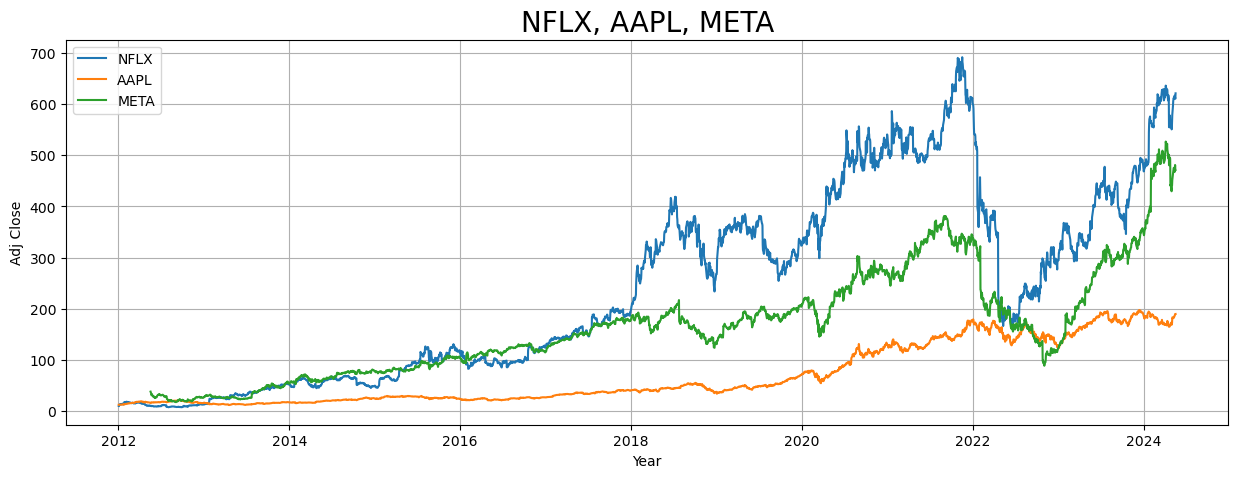

In [14]:
fig, ax = plt.subplots(figsize=(15, 5))

if len(tickers) > 1:
    for item in tickers:
        ax.plot(stock_data['Adj Close'].index, stock_data['Adj Close'][item], label=item)
    title = ', '.join(tickers)
    ax.set_title(title, fontsize=20)
    ax.legend()
else:
    ax.plot(stock_data.index, stock_data['Adj Close'], label=tickers[0])
    ax.set_title(tickers[0], fontsize=20)
    ax.legend()
    
ax.set_ylabel('Adj Close')
ax.set_xlabel('Year')
ax.grid(True)

plt.show()

To be able to evaluate a stock's risk premium I needed to find the risk-free rate. In reality there is rarely a risk-free asset due to inherent systematic risk in the market, so the standard way to calculate this rate is by looking at the yield on government bonds - which are considered the safest assets. In this situation, it's more accurate to find a bond with a similar maturity to that of the stocks we are holding, so I decided to use the US bonds with 10-years till maturity, where we are assuming on average we hold a stock for 10 years.

In [11]:
bond_data = yf.download('^TNX')
display(bond_data)
rfr = bond_data['Close'].iloc[-1] / 100
print(f"Current risk free rate: {rfr}")

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,4.060,4.060,4.060,4.060,4.060,0
1962-01-03,4.030,4.030,4.030,4.030,4.030,0
1962-01-04,3.990,3.990,3.990,3.990,3.990,0
1962-01-05,4.020,4.020,4.020,4.020,4.020,0
1962-01-08,4.030,4.030,4.030,4.030,4.030,0
...,...,...,...,...,...,...
2024-05-24,4.489,4.502,4.459,4.467,4.467,0
2024-05-28,4.453,4.546,4.449,4.542,4.542,0
2024-05-29,4.566,4.638,4.560,4.624,4.624,0


Current risk free rate: 0.04513999938964844


Depending on the time of viewing this code, the yield on these bonds may have changed. As of 31/05/2024, the current rate is around 4.5%, which is relatively high for risk-free debt. This is due to US government trying to alleviate the high inflation by offering high interest methods of saving. In a recent article published by Spears (https://spearswms.com/wealth/higher-rates-will-give-investors-more-choices-as-bonds-become-competitive-with-stocks-in-2024/), it mentions that J.P. Morgan has an emphasis on the fact that bonds are becoming increasingly more attractive in multi-asset portfolios, and how equities are now being used as hedging alternatives.

In [16]:
import pandas as pd
import yfinance as yf

tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
SP500_data = tables[0]
SP500_data

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
497,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [18]:
marketcap_data = []
for item in SP500_data['Symbol']:
    market_caps = {}
    stock = yf.Ticker(item)
    try:
        marketcap_data.append([item, stock.info['marketCap']])
    except KeyError:
        marketcap_data.append([item, None])

marketcap_data[:10]

[['MMM', 57256267776],
 ['AOS', 12640020480],
 ['ABT', 180865499136],
 ['ABBV', 299827036160],
 ['ACN', 188529065984],
 ['ADBE', 249053347840],
 ['AMD', 288625131520],
 ['AES', 13178892288],
 ['AFL', 51952537600],
 ['A', 37908504576]]

In [7]:
import pandas as pd
sp500_df = pd.DataFrame(marketcap_data)
sp500_df = sp500_df.sort_values(1, ascending = False)
sp500_df.reset_index(drop = True, inplace = True)
sp500_df[:10]

,0,1
0,MSFT,3.085375e+12
1,AAPL,2.947981e+12
2,NVDA,2.696785e+12
3,GOOG,2.139952e+12
4,GOOGL,2.139949e+12
5,AMZN,1.836140e+12
6,META,1.184128e+12
7,LLY,7.796552e+11
8,AVGO,6.156780e+11
9,JPM,5.818865e+11


In [8]:
tickers = []
for item in sp500_df[:10][0]:
    tickers.append(item)
tickers

['MSFT', 'AAPL', 'NVDA', 'GOOG', 'GOOGL', 'AMZN', 'META', 'LLY', 'AVGO', 'JPM']

<a id="Metric-calculations"></a>
# Metric Calculations

It can be argued that using data from the past 40 years may not be beneficial, despite the huge amount of data supposedly yielding accurate measurements, it doesn't take into account current market dynamics. The reason we use this information is to build a portfolio today that then yields future returns, but as mentioned above, market sentiment and dynamics surrounding an individual stock and the market as a whole have changed, producing a skewed measure of risk and return. The solution to this is to use the previous 5 years of data, giving a more up-to-date metric. 

The code below runs what it known as a Monte Carlo simulation, where random weights are assigned to the stocks listed in **tickers** and then the portfolio return and standard deviation are calculated. The code works for any number of tickers and simulations. In theory, this code can be run with the entire market portfolio, but feasible conclusions could only be drawn after millions of simulations.

To mimic the market portfolio, I use the top 10 stocks with the highest market cap in the S&P500, but as mentioned, any tickers can be inputted into the variable.

In [12]:
import datetime
import yfinance as yf
import numpy as np

def sharpe_simulation(tickers, n_sims, start=None, end=None):
    if start is None:
        start = datetime.datetime.today() - datetime.timedelta(365*5)
        
    stock_data = yf.download(tickers, start, end)
    adj_close = stock_data['Adj Close']
    stock_ret = adj_close.pct_change()
    
    port_wts = []
    port_ann_rets = [] 
    port_risks = []
    port_sharpe_rts = []
    
    for i in range(n_sims):
        n = len(tickers)
        alpha = np.ones(n)
        weights = np.random.dirichlet(alpha)
        weights = np.expand_dims(weights, axis=1)
        
        port_rets = stock_ret.dot(weights)
        total_ret = (port_rets+1).prod() - 1
        n_years = (port_rets.index.max() - port_rets.index.min()).days / 365
        ann_ret = (total_ret+1)**(1/n_years) - 1
        port_sd = port_rets.std()*np.sqrt(250)
        sharpe = (ann_ret - rfr) / port_sd
        
        port_wts.append(weights)
        port_ann_rets.append(ann_ret)
        port_risks.append(port_sd)
        port_sharpe_rts.append(sharpe)
    
    return np.array(port_wts), np.array(port_risks), np.array(port_ann_rets), np.array(port_sharpe_rts) 

In [13]:
port_wts, port_risks, port_ann_rets, port_sharpe_rts = sharpe_simulation(tickers, n_sims=100000)

[*********************100%%**********************]  10 of 10 completed


<a id="Visualisation"></a>
# Visualisation

Using a simple scatterplot to visualise the risk vs return of each portfolio, we can clearly see a relatively defined efficient frontier. This is a very interesting conclusion as this idea is often exercised in theory, but in fact it still stands in practice.

In [24]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

Text(0, 0.5, 'Portflio return')

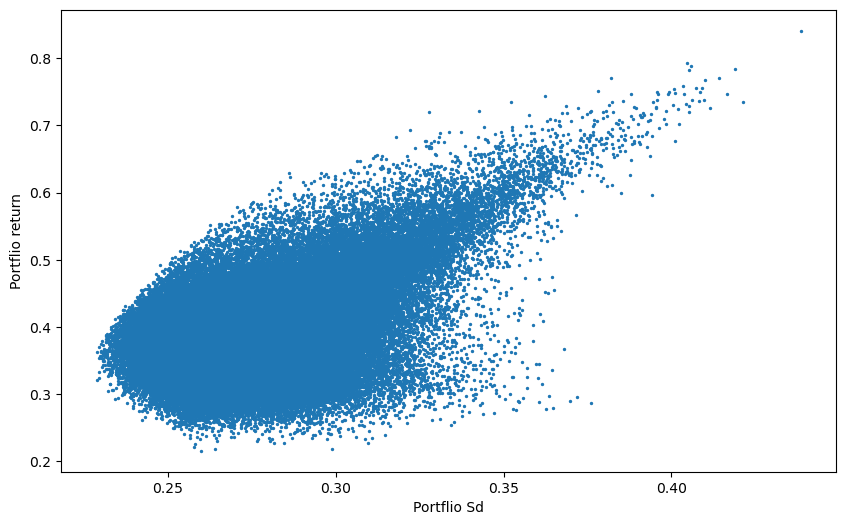

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(port_risks, port_ann_rets, s = 2)
plt.xlabel('Portflio Sd')
plt.ylabel('Portflio return')

<a id="Optimisation"></a>
# Optimisation

We now include the addition of the risk-free asset (10-year US bond). The following code filters through each portfolio in the simulation and finds the allocation with the highest Sharpe ratio (risk premium / risk).

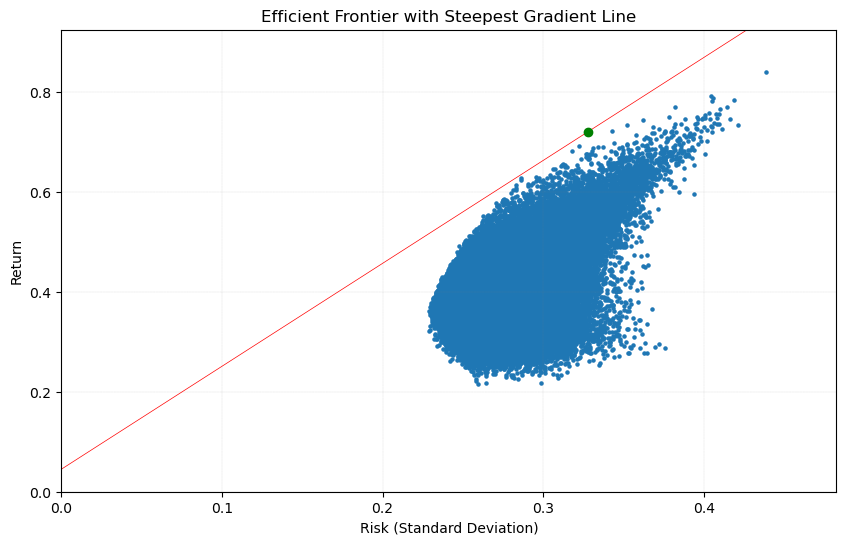

In [16]:
slopes = (port_ann_rets - rfr) / port_risks
max_slope_index = np.argmax(np.abs(slopes))
P2 = (port_risks[max_slope_index], port_ann_rets[max_slope_index])

m = (P2[1] - rfr) / P2[0]
c = rfr

def line(x):
    return m * x + c

x_values = np.linspace(0, max(port_risks), 100)
y_values = line(x_values)

plt.figure(figsize=(10,6))
plt.scatter(port_risks, port_ann_rets, s = 5, label='Portfolios')
plt.plot(x_values, y_values, color='red', linewidth=0.5, label='Steepest Line')
plt.scatter(*P2, color='green', zorder=5, label='Steepest Point')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Return')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.1)
plt.xlim(0, max(port_risks) + 0.1 * max(port_risks))
plt.ylim(0, max(port_ann_rets) + 0.1 * max(port_ann_rets))
plt.title('Efficient Frontier with Steepest Gradient Line')
plt.show()

In [17]:
print('\033[1mOptimal Portfolio\033[0m')
print('weights:')
for i, comp in enumerate(tickers):
    comp = '  - '+comp
    print(f'{comp} {np.around(port_wts[max_slope_index][i][0], 3)}')
print(f'risk: {np.around(port_risks[max_slope_index][0], 3)}')
print(f'return: {np.around(port_ann_rets[max_slope_index][0], 3)}')
print(f'sharpe ratio: {np.around(port_sharpe_rts[max_slope_index][0], 3)}')

Optimal Portfolio
weights:
  - MSFT 0.044
  - AAPL 0.041
  - NVDA 0.026
  - GOOG 0.031
  - GOOGL 0.009
  - AMZN 0.033
  - META 0.339
  - LLY 0.012
  - AVGO 0.006
  - JPM 0.459
risk: 0.328
return: 0.721
sharpe ratio: 2.061


Using the above data, we can now evaluate the tangency portfolio. In theory, all investors should hold some weighting of the risk-free asset and the tangency portfolio - this weight depends on the risk aversion of each investor (i.e. a relatively risk-averse individual will choose to invest more in the risk-free asset, whereas someone who is less risk-averse may choose to short the risk-free asset and further expose their position by investing a weight that is greater than 1 in the tangency portfolio). This is hard to calculate as it requires the knowledge of an individual's utility function; this is not a readily available function, as well as the fact that investors are rarely fully rational.

<a id="Add-findings"></a>

# Additional findings

Throughout this research, I have experimented with the inclusion of different stocks in the portfolio - extremely volatile stocks such as META will yield very interesting frontier shapes:

[*********************100%%**********************]  3 of 3 completed


Text(0, 0.5, 'Portflio return')

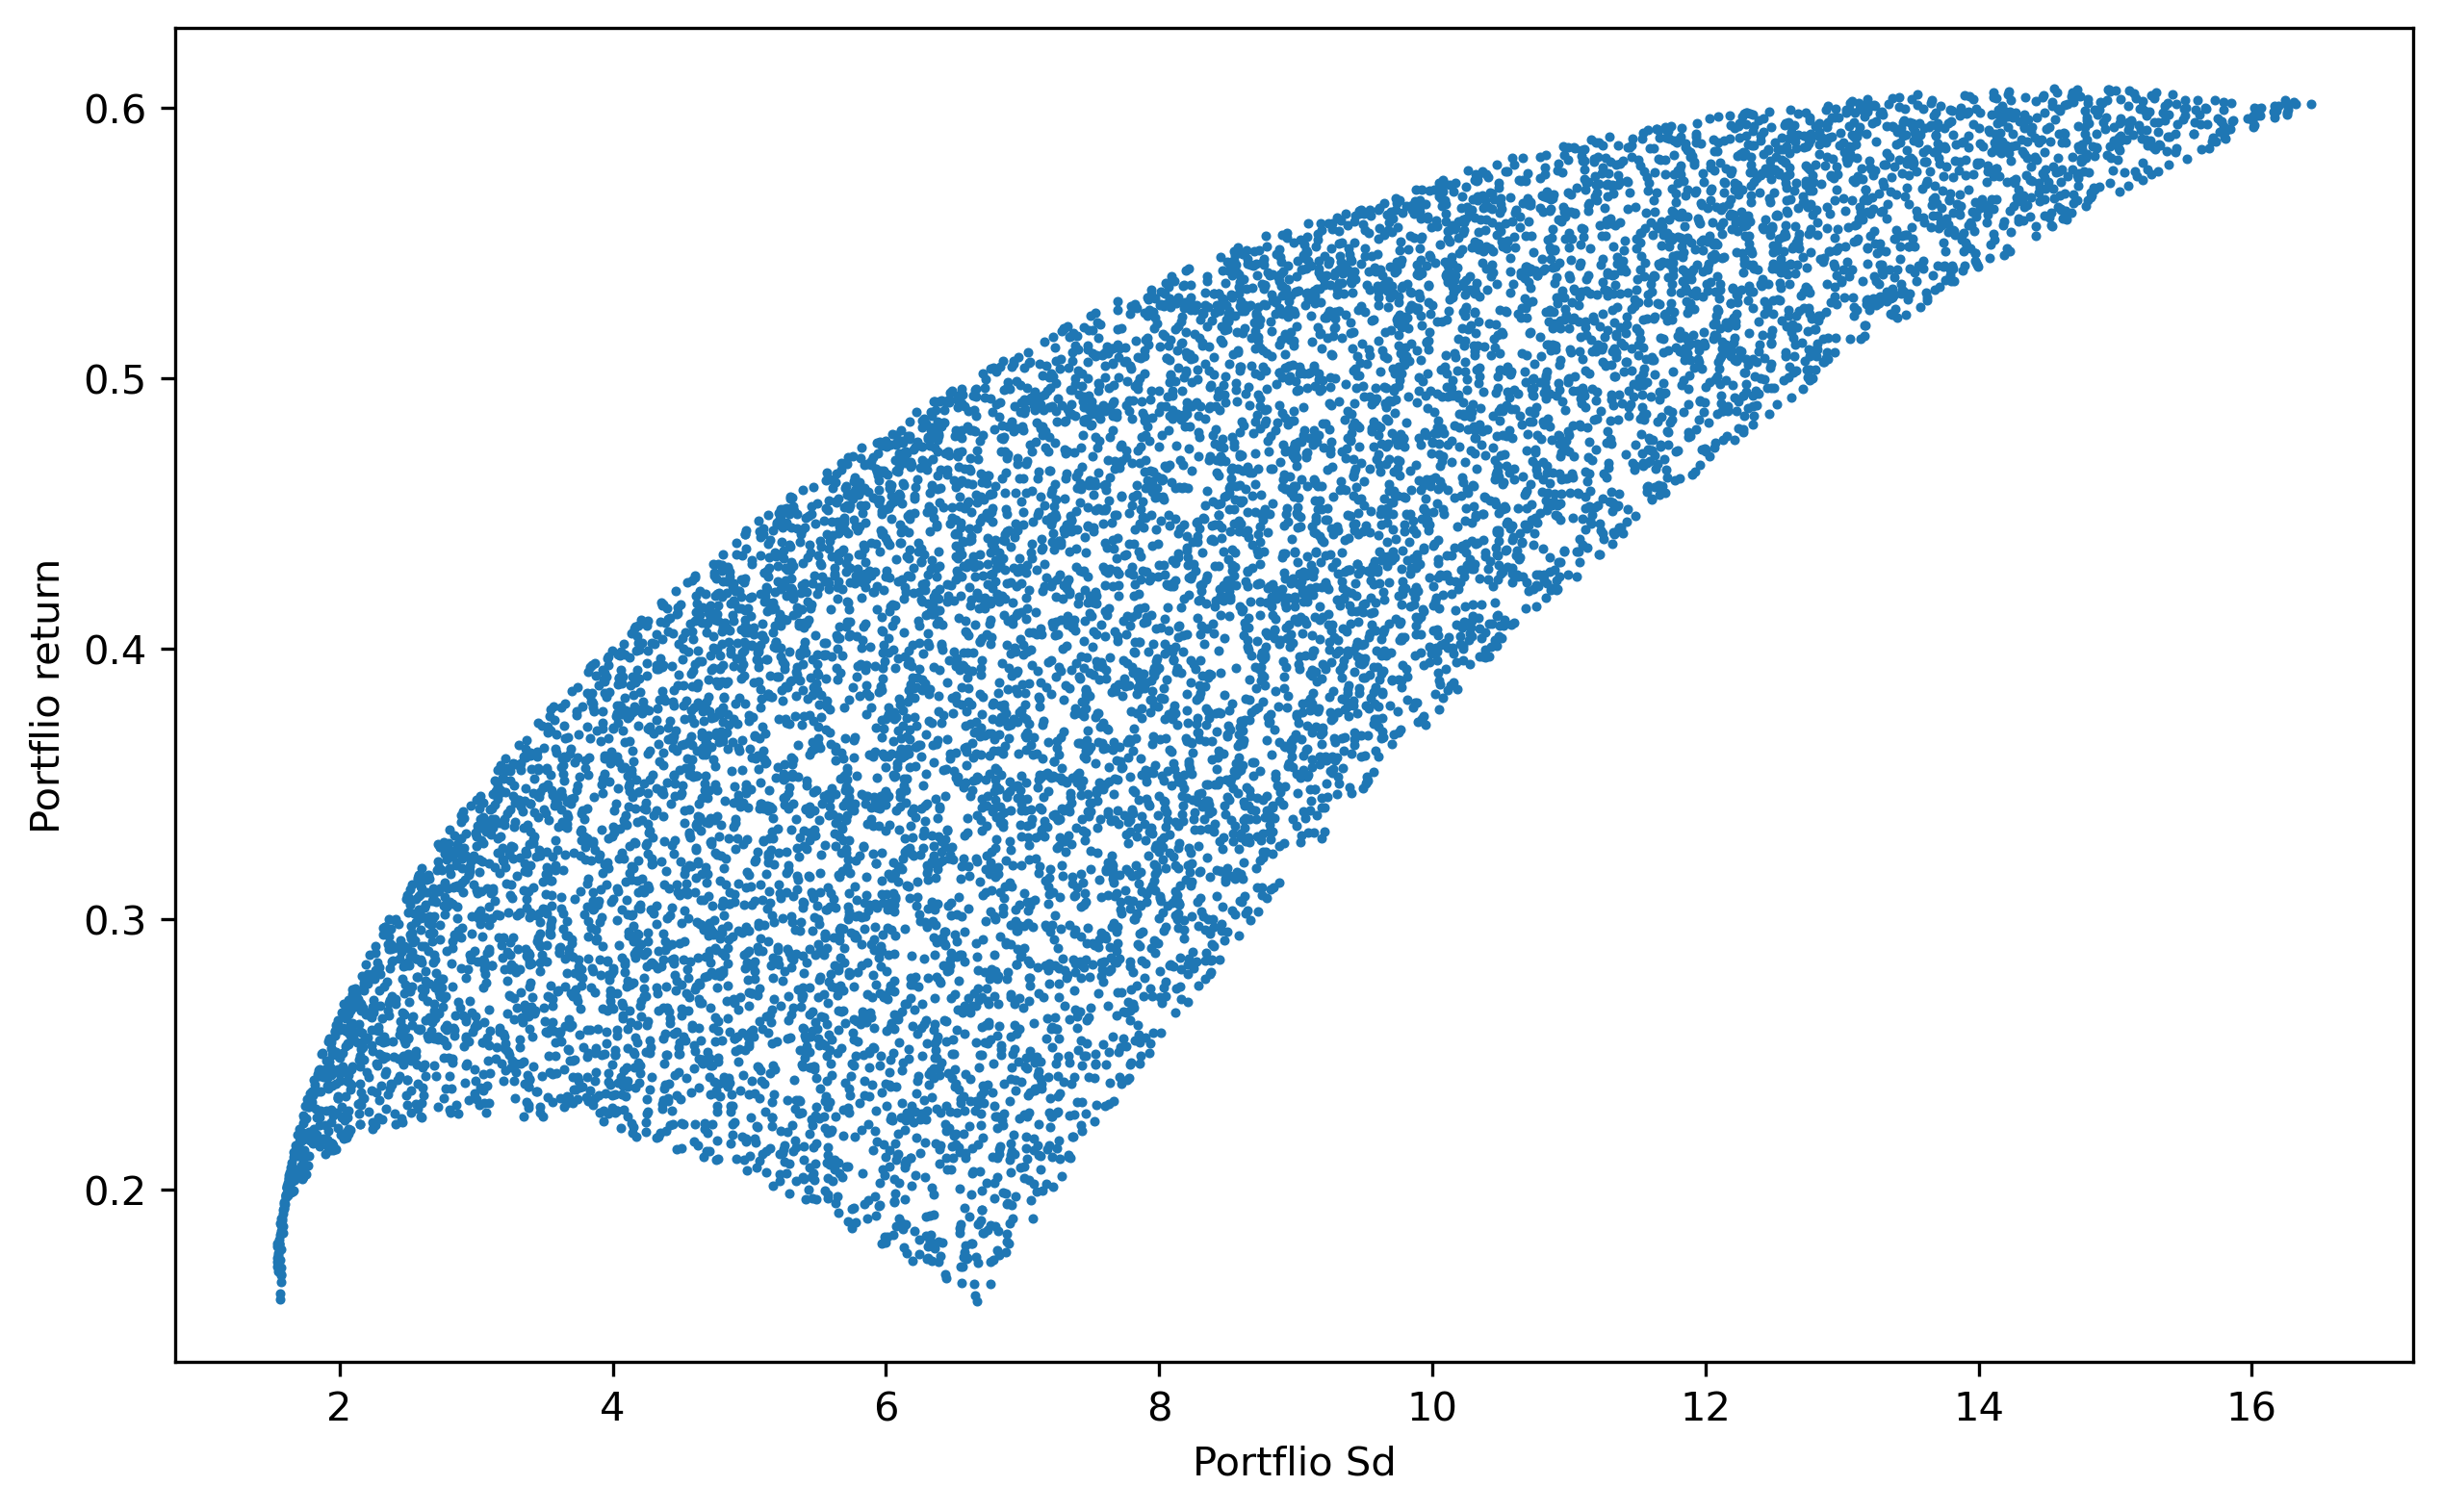

In [309]:
tickers = ['LPA', 'SMMT', 'FTEL']
port_wts, port_risks, port_ann_rets, port_sharpe_rts = sharpe_simulation(tickers, n_sims=10000)
plt.figure(figsize=(10,6))
plt.scatter(port_risks, port_ann_rets, s = 2)
plt.xlabel('Portflio Sd')
plt.ylabel('Portflio return')

[*********************100%%**********************]  3 of 3 completed


Text(0, 0.5, 'Portflio return')

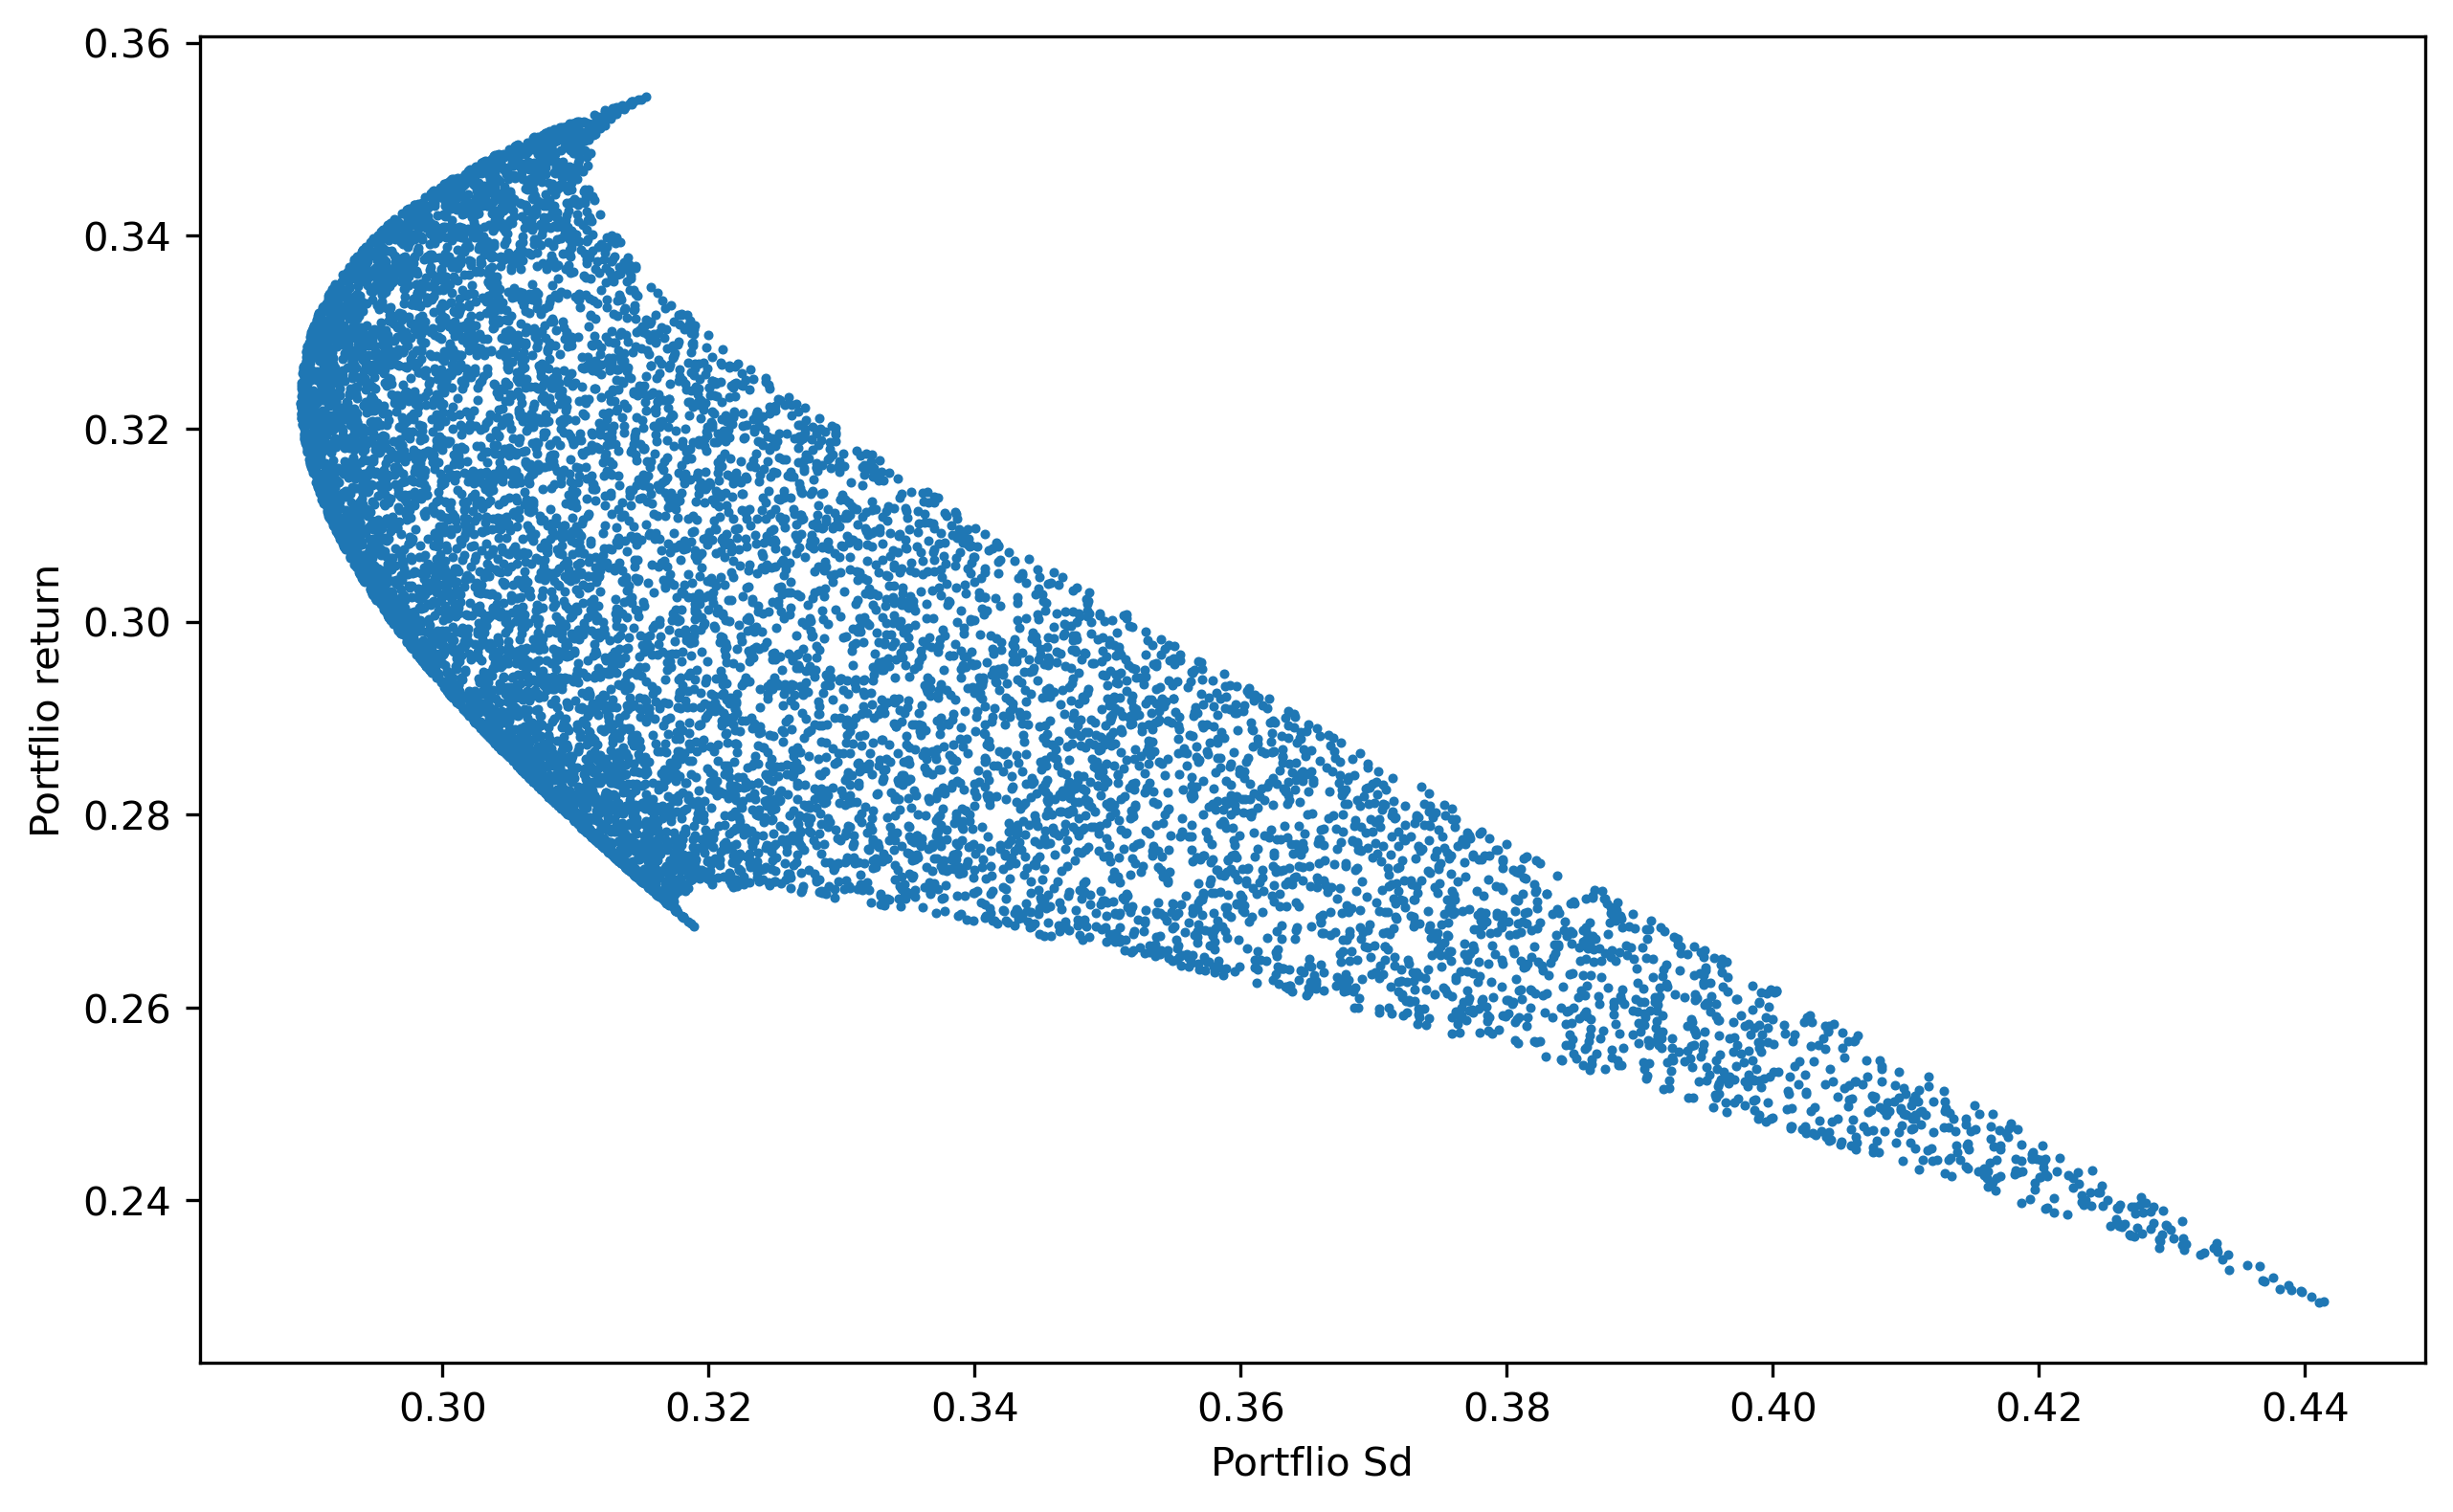

In [310]:
tickers = ['META', 'AAPL', 'GOOGL']
port_wts, port_risks, port_ann_rets, port_sharpe_rts = sharpe_simulation(tickers, n_sims=10000)
plt.figure(figsize=(10,6))
plt.scatter(port_risks, port_ann_rets, s = 2)
plt.xlabel('Portflio Sd')
plt.ylabel('Portflio return')

[*********************100%%**********************]  3 of 3 completed


Text(0, 0.5, 'Portflio return')

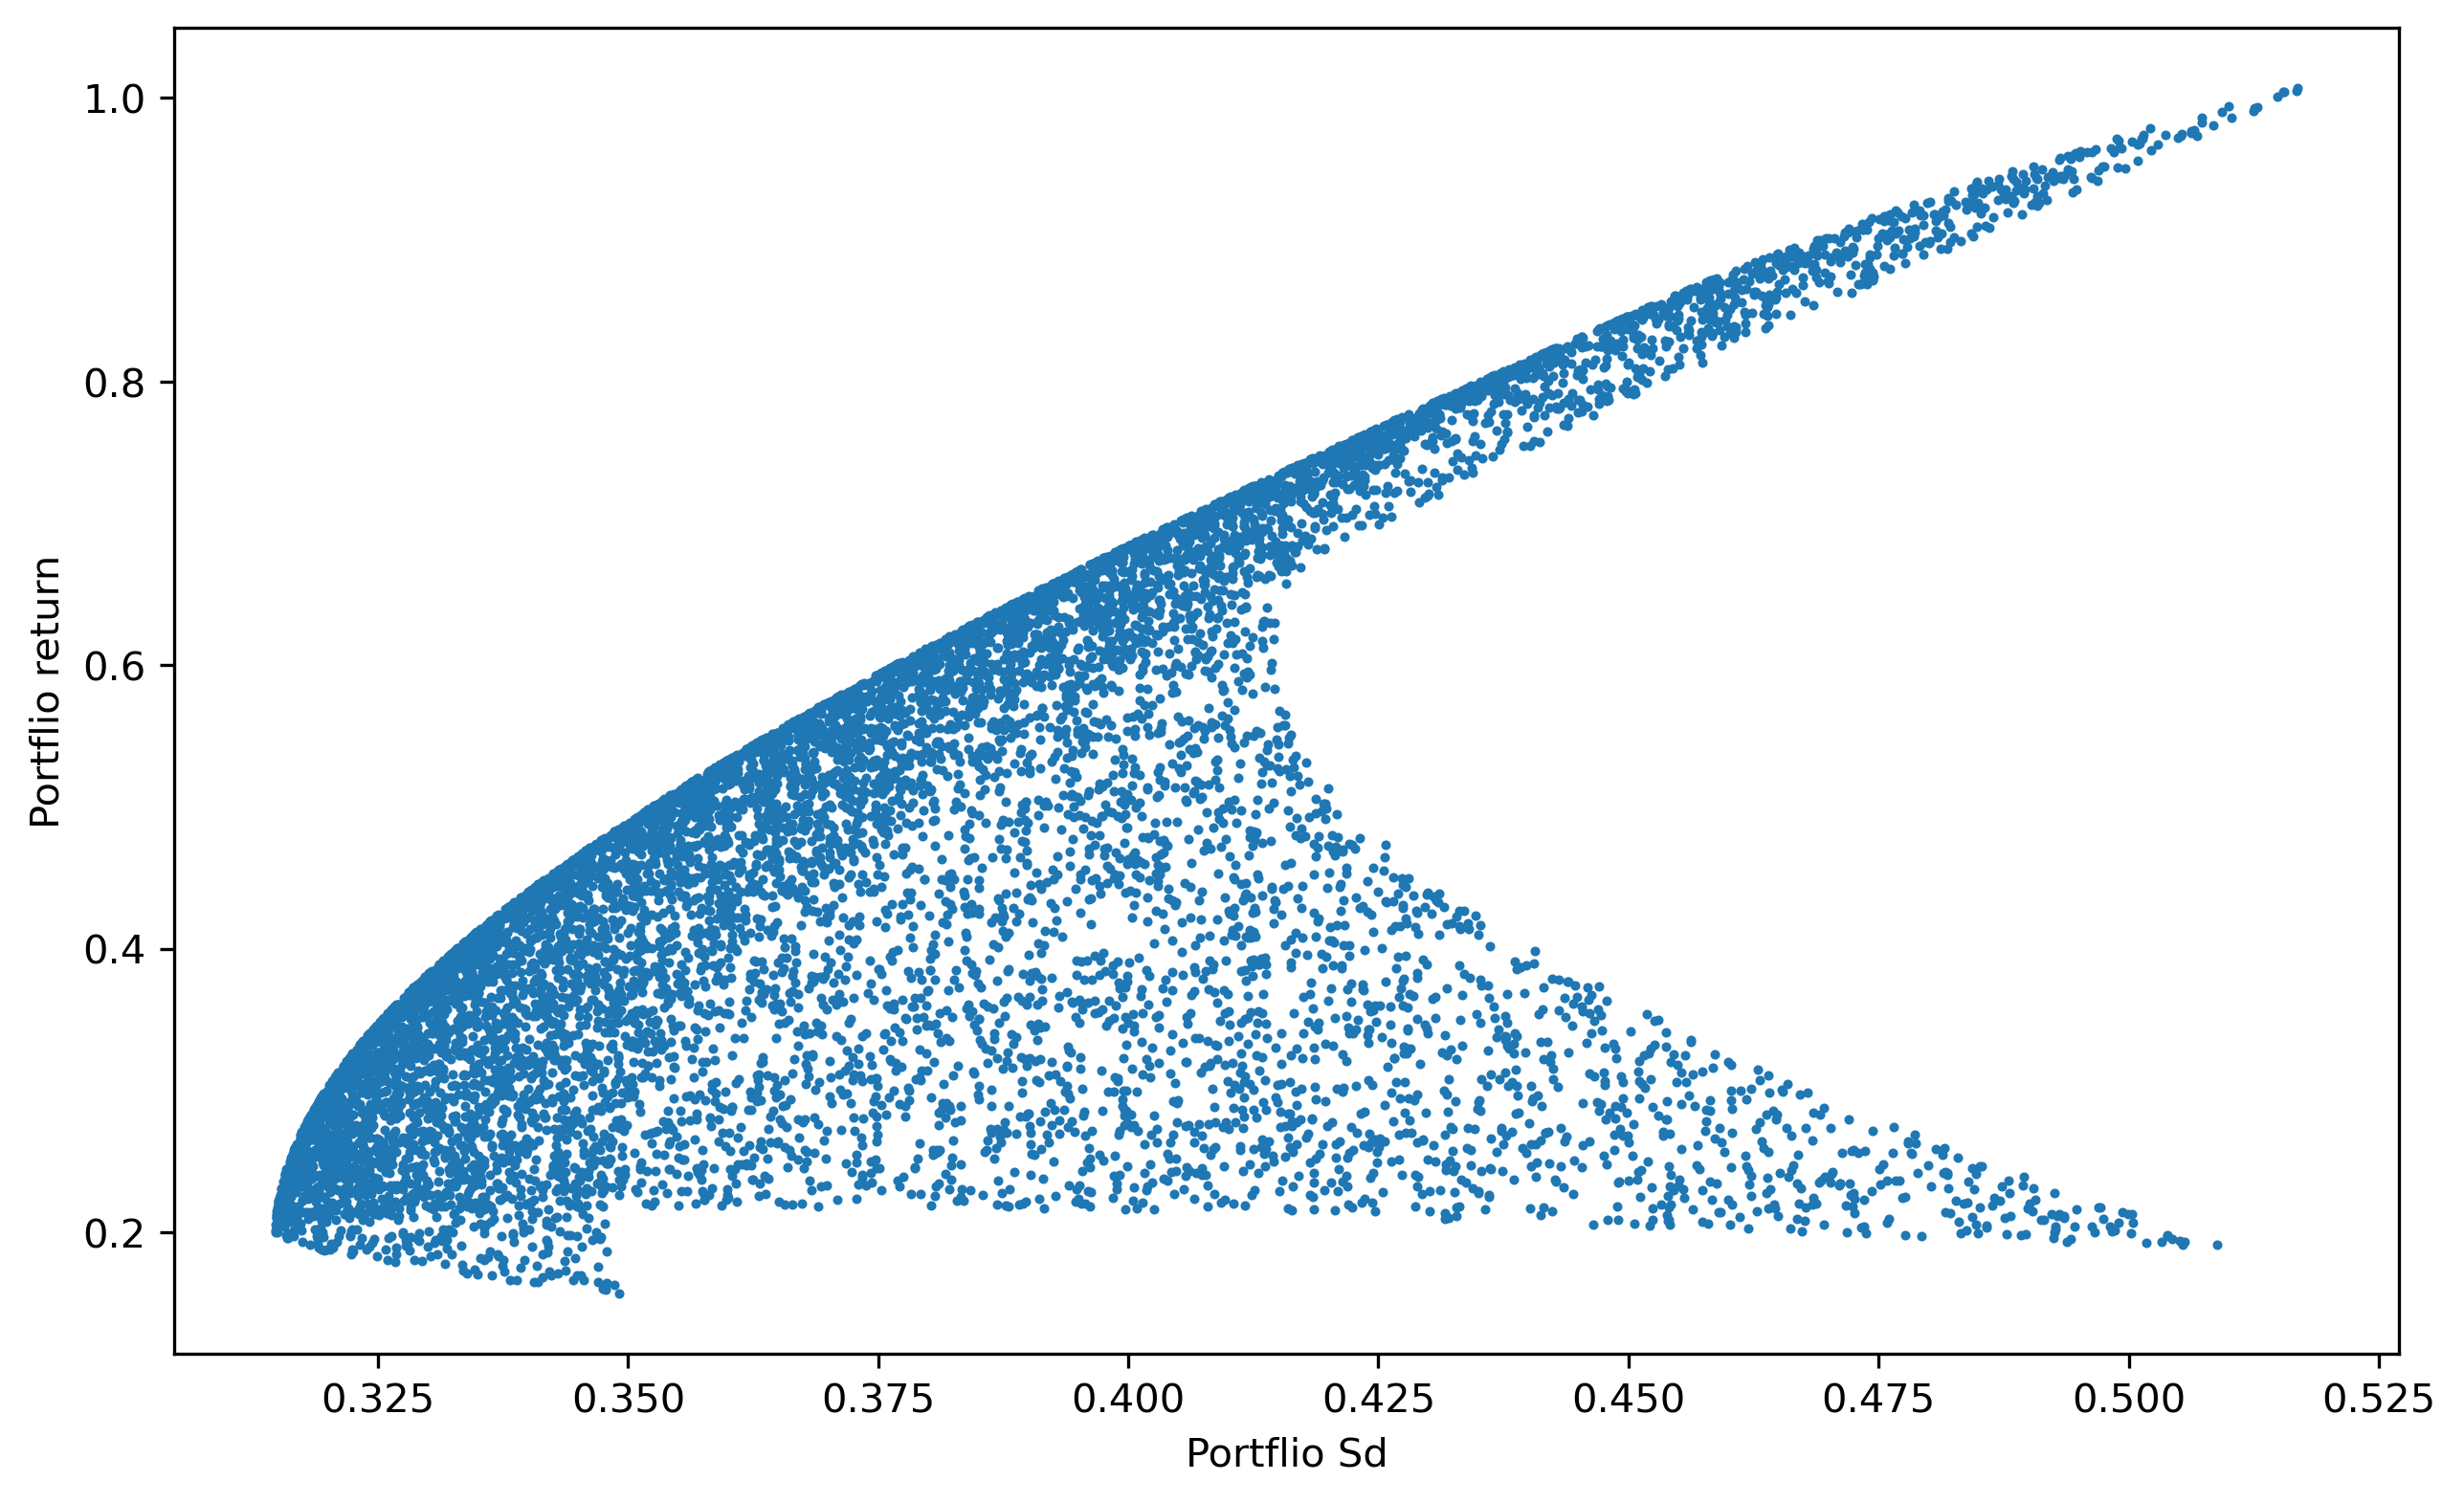

In [311]:
tickers = ['GBX', 'NVDA', 'AMZN']
port_wts, port_risks, port_ann_rets, port_sharpe_rts = sharpe_simulation(tickers, n_sims=10000)
plt.figure(figsize=(10,6))
plt.scatter(port_risks, port_ann_rets, s = 2)
plt.xlabel('Portflio Sd')
plt.ylabel('Portflio return')

<a id="Application"></a>

# Application

This code proves a very visual interpretation of portfolio optimisation, but this raises the question on how it can be practically used:
- In theory, the **tickers** variable can be adjusted to contain the entire market portfolio, as said above. If millions of simulations were run over the course of a couple days, then a relatively useful efficient frontier will have been produced, thus inference on the optimal portfolio for the entire market can be used. This is essentially the indexes are formed; fund managers find the optimal weightings of each stock in that specific sector or market and form an index fund to try and mimic the performance.
- For an individual investor, this project provides limited research into the optimal market portfolio, however it can give a very good insight on a smaller basis, say 1-10 stocks. If an individual has a few stocks or funds in mind that they want to invest, then they can input the tickers and the optimal weightings will be outputted.